In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from uszipcode import SearchEngine


C:\Users\mnawa\anaconda3\envs\dev\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Read data files
year_data = []

for i in range(0,12):    
    load_str = f"source_data/2022/JC-2022{str(i+1).zfill(2)}-citibike-tripdata.csv"
    print(load_str)
    month_data = pd.read_csv(load_str).sort_values(by = "started_at")    
    #drop any rows with null values
    month_data = month_data.dropna(how="any")
    #append month_data to produce a list of dataframes
    year_data.append(month_data)
    
#re-shape the list by stacking dataframes vertically and make into  dataframe    
year_2022_data = pd.concat(year_data,axis = 0)    
year_2022_data.tail()

source_data/2022/JC-202201-citibike-tripdata.csv
source_data/2022/JC-202202-citibike-tripdata.csv
source_data/2022/JC-202203-citibike-tripdata.csv
source_data/2022/JC-202204-citibike-tripdata.csv
source_data/2022/JC-202205-citibike-tripdata.csv
source_data/2022/JC-202206-citibike-tripdata.csv
source_data/2022/JC-202207-citibike-tripdata.csv
source_data/2022/JC-202208-citibike-tripdata.csv
source_data/2022/JC-202209-citibike-tripdata.csv
source_data/2022/JC-202210-citibike-tripdata.csv
source_data/2022/JC-202211-citibike-tripdata.csv
source_data/2022/JC-202212-citibike-tripdata.csv


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
33476,8F99C01FD65556DF,classic_bike,2022-12-31 23:40:55,2022-12-31 23:58:06,Leonard Gordon Park,JC080,9 St HBLR - Jackson St & 8 St,HB305,40.745920,-74.057159,40.747907,-74.038412,member
4587,BE2DC8F41B9EFAD4,classic_bike,2022-12-31 23:40:57,2023-01-01 00:35:14,City Hall,JC003,City Hall,JC003,40.717732,-74.043845,40.717732,-74.043845,casual
15920,D1EBF2C2D6B1CB38,classic_bike,2022-12-31 23:50:07,2022-12-31 23:54:45,Pershing Field,JC024,Leonard Gordon Park,JC080,40.742630,-74.051858,40.745910,-74.057271,casual
30447,96A6A33AE3CFECD9,classic_bike,2022-12-31 23:53:58,2023-01-01 00:10:29,Adams St & 2 St,HB407,4 St & Grand St,HB301,40.739809,-74.036804,40.742258,-74.035111,casual
46919,5DA04F62681F40BA,electric_bike,2022-12-31 23:58:26,2023-01-01 00:24:12,8 St & Washington St,HB603,8 St & Washington St,HB603,40.745984,-74.028199,40.745984,-74.028199,casual


In [3]:
year_2022_citibike_data = year_2022_data.set_index("ride_id",drop=True)
year_2022_citibike_data.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
ride_id,,,,,,,,,,,,
11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual
554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member
4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member
E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member
DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual


In [4]:
count_rides = year_2022_citibike_data[['start_station_id','end_station_id']].nunique()
count_rides.agg("product")

27434

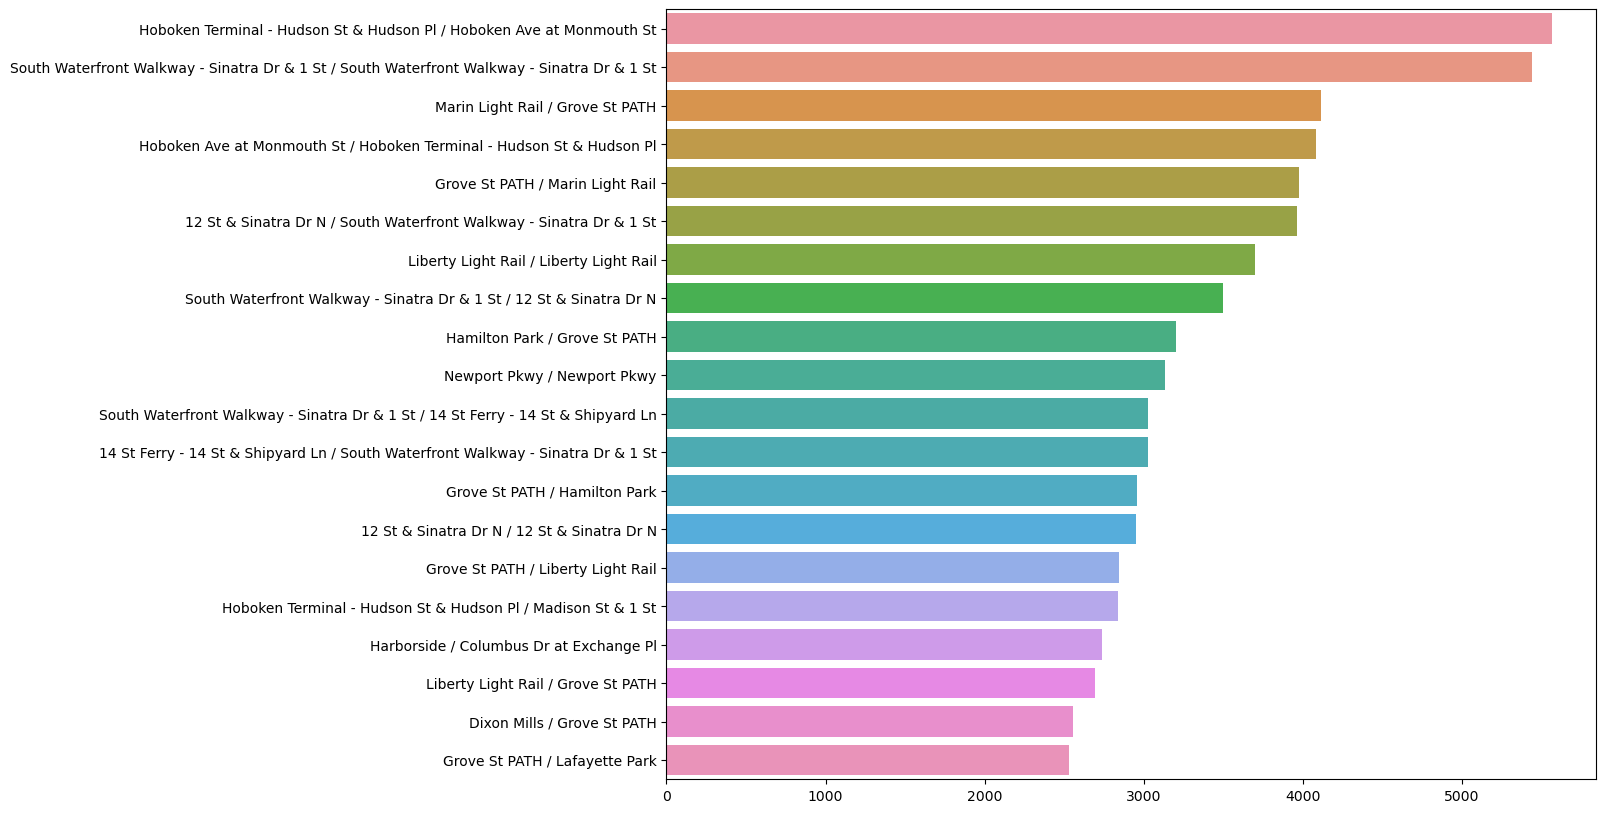

In [5]:
trips = year_2022_citibike_data.value_counts(['start_station_name','end_station_name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

In [6]:
df_start = year_2022_citibike_data[['start_station_id','start_station_name','start_lat','start_lng']].drop_duplicates(subset = ['start_station_id'])
df_start.set_index('start_station_id', inplace=True)

df_end = year_2022_citibike_data[['end_station_id','end_station_name','end_lat','end_lng']].drop_duplicates(subset = ['end_station_id'])
df_end.set_index('end_station_id', inplace=True)


In [7]:
df_end

,end_station_name,end_lat,end_lng
end_station_id,,,
JC057,Riverview Park,40.744319,-74.043991
JC094,Glenwood Ave,40.727551,-74.071061
JC008,Newport Pkwy,40.728745,-74.032108
JC106,Columbus Dr at Exchange Pl,40.716870,-74.032810
JC009,Hamilton Park,40.727596,-74.044247
...,...,...,...
5772.05,Morton St & Washington St,40.731150,-74.008870
5971.09,E 22 St & 2 Ave,40.737169,-73.981225
6779.04,Broadway & W 51 St,40.762288,-73.983362


In [8]:
# Initialize a list to store the locations
start_zipcode = []
end_zipcode = []

eng = SearchEngine()
# Iterate through DataFrame rows and reverse geocode latitude and longitude
for index, row in df_start.iterrows():
    start_location = eng.by_coordinates(row['start_lat'], row['start_lng'])
    if start_location is not None:
        zipcode = start_location[0].zipcode
    else:
        zipcode = "Unknown"  # Handle the case when reverse geocoding fails
    
    start_zipcode.append(zipcode)

for index, row in df_end.iterrows():    
    end_location = eng.by_coordinates(row['end_lat'], row['end_lng'])
    if end_location is not None:
        zipcode = end_location[0].zipcode
    else:
        zipcode = "Unknown"  # Handle the case when reverse geocoding fails
    end_zipcode.append(zipcode)

df_start["start_zipcode"] = start_zipcode
df_end["end_zipcode"] = end_zipcode

In [9]:
df_end

,end_station_name,end_lat,end_lng,end_zipcode
end_station_id,,,,
JC057,Riverview Park,40.744319,-74.043991,07030
JC094,Glenwood Ave,40.727551,-74.071061,07306
JC008,Newport Pkwy,40.728745,-74.032108,07310
JC106,Columbus Dr at Exchange Pl,40.716870,-74.032810,07311
JC009,Hamilton Park,40.727596,-74.044247,07310
...,...,...,...,...
5772.05,Morton St & Washington St,40.731150,-74.008870,10014
5971.09,E 22 St & 2 Ave,40.737169,-73.981225,10010
6779.04,Broadway & W 51 St,40.762288,-73.983362,10020


In [12]:
df_start

,start_station_name,start_lat,start_lng,start_zipcode
start_station_id,,,,
JC057,Riverview Park,40.744319,-74.043991,07030
JC056,Sip Ave,40.730897,-74.063913,07306
JC005,Grove St PATH,40.719586,-74.043117,07302
JC106,Columbus Dr at Exchange Pl,40.716870,-74.032810,07311
JC066,Newport PATH,40.727224,-74.033759,07310
...,...,...,...,...
JC109,Bergen Ave & Sip Ave,40.731009,-74.064437,07306
JC097,York St & Marin Blvd,40.716615,-74.042412,07302
MTL-ECO5-LAB,MTL-ECO5-LAB,40.747166,-74.088964,07032


In [15]:
#dfa=pd.merge(year_2022_citibike_data, df_start, how = 'left',left_on=['start_station_id','start_station_name','start_lat','start_lng'],right_on=['start_station_id','start_station_name','start_lat','start_lng'])

df = year_2022_citibike_data.reset_index().merge(df_start, 
                                                 how = 'left',
                                                 left_on=['start_station_id','start_station_name','start_lat','start_lng'],
                                                 right_on=['start_station_id','start_station_name','start_lat','start_lng']).set_index('ride_id')

df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_zipcode
ride_id,,,,,,,,,,,,,
11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,07030
554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,07306
4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,07306
E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,07302
DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,07311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8F99C01FD65556DF,classic_bike,2022-12-31 23:40:55,2022-12-31 23:58:06,Leonard Gordon Park,JC080,9 St HBLR - Jackson St & 8 St,HB305,40.745920,-74.057159,40.747907,-74.038412,member,NaN
BE2DC8F41B9EFAD4,classic_bike,2022-12-31 23:40:57,2023-01-01 00:35:14,City Hall,JC003,City Hall,JC003,40.717732,-74.043845,40.717732,-74.043845,casual,07302
D1EBF2C2D6B1CB38,classic_bike,2022-12-31 23:50:07,2022-12-31 23:54:45,Pershing Field,JC024,Leonard Gordon Park,JC080,40.742630,-74.051858,40.745910,-74.057271,casual,NaN


In [16]:
citibike_data_2022 = df.reset_index().merge(df_end, 
                                        how = 'left',
                                        left_on=['end_station_id','end_station_name','end_lat','end_lng'],
                                        right_on=['end_station_id','end_station_name','end_lat','end_lng']).set_index('ride_id')

citibike_data_2022

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_zipcode,end_zipcode
ride_id,,,,,,,,,,,,,,
11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,07030,07030
554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,07306,07306
4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,07306,07306
E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,07302,07310
DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,07311,07311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8F99C01FD65556DF,classic_bike,2022-12-31 23:40:55,2022-12-31 23:58:06,Leonard Gordon Park,JC080,9 St HBLR - Jackson St & 8 St,HB305,40.745920,-74.057159,40.747907,-74.038412,member,NaN,07030
BE2DC8F41B9EFAD4,classic_bike,2022-12-31 23:40:57,2023-01-01 00:35:14,City Hall,JC003,City Hall,JC003,40.717732,-74.043845,40.717732,-74.043845,casual,07302,07302
D1EBF2C2D6B1CB38,classic_bike,2022-12-31 23:50:07,2022-12-31 23:54:45,Pershing Field,JC024,Leonard Gordon Park,JC080,40.742630,-74.051858,40.745910,-74.057271,casual,NaN,07307


In [ ]:
citibike_data_2022.to_csv("cleaned_data/2022/citibike_data_2022.csv")